In [93]:
# !pip install simple_image_download==0.4
# instalation de labelImg pour annoter les images
# !pip install labelImg
# !pip install ultralytics

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from ultralytics import YOLO
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
model=YOLO('yolov8s.pt')

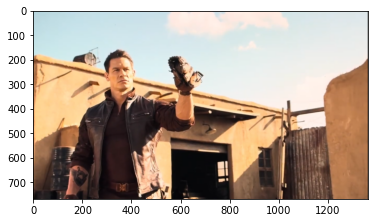

In [39]:
image= cv2.imread("./data/test/img.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [40]:
results=model.predict(image, conf=0.6, save=True, save_conf=True)


0: 384x640 1 person, 912.6ms
Speed: 8.0ms preprocess, 912.6ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2


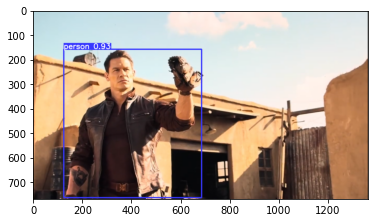

In [41]:
plt.imshow(results[0].plot())

In [42]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9326])
data: tensor([[125.5646, 159.5463, 687.7994, 762.0916,   0.9326,   0.0000]])
id: None
is_track: False
orig_shape: (768, 1366)
shape: torch.Size([1, 6])
xywh: tensor([[406.6820, 460.8189, 562.2349, 602.5453]])
xywhn: tensor([[0.2977, 0.6000, 0.4116, 0.7846]])
xyxy: tensor([[125.5646, 159.5463, 687.7994, 762.0916]])
xyxyn: tensor([[0.0919, 0.2077, 0.5035, 0.9923]])

In [43]:
x1=int(results[0].boxes.data[0].numpy()[0])
y1=int(results[0].boxes.data[0].numpy()[1])
x2=int(results[0].boxes.data[0].numpy()[2])
y2=int(results[0].boxes.data[0].numpy()[3])

In [44]:
x1,y1,x2,y2

(125, 159, 687, 762)

In [ ]:
cv2.rectangle(image,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(image)

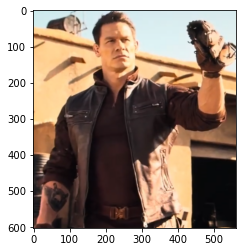

In [45]:
persImg=image[y1:y2,x1:x2]
plt.imshow(persImg)

In [46]:
face_classifier = cv2.CascadeClassifier('HAAR/haarcascade_frontalface_default.xml')

In [47]:
gray = cv2.cvtColor(persImg,cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray,1.3,4)

In [48]:
len(faces)

1

In [49]:
for (x,y,w,h) in faces:
    face=persImg[y:y+h,x:x+w]
    face = cv2.resize(face,dsize=(150,150))
    cv2.rectangle(persImg,(x,y),(x+w,y+h),(255,0,0),3)

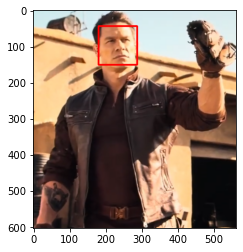

In [50]:
plt.imshow(persImg)

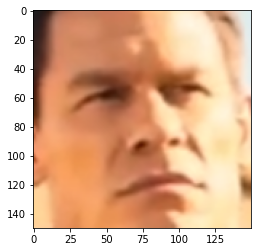

In [51]:
plt.imshow(face)

In [53]:
face = cv2.resize(face, (150, 150))
face = face / 255.0
face = np.expand_dims(face, axis=0)

prediction = model_cnn.predict(face)
prediction

1/1 [==============================] - 0s 234ms/step


array([[ 6.2792e-06,     0.99999,  4.6256e-06]], dtype=float32)

# Collecte de donnees

In [17]:
from simple_image_download import simple_image_download as simp

response = simp.simple_image_download
keywords = ["jackie chan","john cena"]

for kw in keywords:
    response().download(kw , 300)

KeyboardInterrupt: 


0: 640x640 (no detections), 775.9ms
Speed: 9.0ms preprocess, 775.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 448x640 1 person, 565.5ms
Speed: 8.0ms preprocess, 565.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



2


0: 640x448 1 person, 597.4ms
Speed: 4.0ms preprocess, 597.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 628.3ms
Speed: 4.0ms preprocess, 628.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 581.4ms
Speed: 4.0ms preprocess, 581.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 1 person, 876.7ms
Speed: 9.0ms preprocess, 876.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 683.2ms
Speed: 5.0ms preprocess, 683.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x480 1 person, 779.9ms
Speed: 5.0ms preprocess, 779.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 416x640 1 person, 564.5ms
Speed: 5.0ms preprocess, 564.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1



0: 480x640 1 person, 605.4ms
Speed: 7.0ms preprocess, 605.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 416x640 1 person, 593.4ms
Speed: 5.0ms preprocess, 593.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 510.6ms
Speed: 5.0ms preprocess, 510.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 1 person, 750.0ms
Speed: 8.0ms preprocess, 750.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x448 2 persons, 551.5ms
Speed: 5.0ms preprocess, 551.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
1



0: 448x640 1 person, 531.6ms
Speed: 5.0ms preprocess, 531.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 1 person, 539.6ms
Speed: 5.0ms preprocess, 539.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 503.6ms
Speed: 5.0ms preprocess, 503.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 384x640 1 person, 683.2ms
Speed: 4.0ms preprocess, 683.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 2 persons, 568.5ms
Speed: 5.0ms preprocess, 568.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0



0: 448x640 1 person, 1 remote, 578.4ms
Speed: 6.0ms preprocess, 578.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0



0: 416x640 2 persons, 1 tie, 486.7ms
Speed: 4.0ms preprocess, 486.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


3


0
0


0: 480x640 1 person, 577.5ms
Speed: 5.0ms preprocess, 577.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 530.6ms
Speed: 4.0ms preprocess, 530.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x640 2 persons, 1 tie, 855.7ms
Speed: 8.0ms preprocess, 855.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1
0


0: 640x576 1 person, 792.9ms
Speed: 8.0ms preprocess, 792.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 483.7ms
Speed: 4.0ms preprocess, 483.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 512x640 2 persons, 1 tie, 706.1ms
Speed: 6.0ms preprocess, 706.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0
0


0: 640x384 1 person, 463.8ms
Speed: 3.0ms preprocess, 463.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 544x640 1 person, 643.3ms
Speed: 7.0ms preprocess, 643.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x576 1 person, 1 frisbee, 807.8ms
Speed: 9.0ms preprocess, 807.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0


1


0: 384x640 1 person, 471.7ms
Speed: 4.0ms preprocess, 471.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x480 1 person, 1 tie, 745.0ms
Speed: 6.0ms preprocess, 745.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 448x640 2 persons, 2 ties, 650.3ms
Speed: 5.0ms preprocess, 650.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1
0
0


0: 320x640 1 person, 1 tie, 516.6ms
Speed: 4.0ms preprocess, 516.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 640x480 1 person, 647.3ms
Speed: 5.0ms preprocess, 647.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 352x640 1 person, 514.6ms
Speed: 4.0ms preprocess, 514.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 2 persons, 1 cell phone, 553.5ms
Speed: 5.0ms preprocess, 553.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0
0



0: 384x640 1 person, 524.6ms
Speed: 8.0ms preprocess, 524.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 601.4ms
Speed: 4.0ms preprocess, 601.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 480x640 1 person, 780.9ms
Speed: 7.0ms preprocess, 780.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x416 1 person, 1 baseball glove, 659.2ms
Speed: 4.0ms preprocess, 659.2ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x320 1 person, 619.3ms
Speed: 4.0ms preprocess, 619.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 320x640 1 person, 1 tie, 529.6ms
Speed: 4.0ms preprocess, 529.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 640x544 1 person, 1 tie, 823.8ms
Speed: 8.0ms preprocess, 823.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 384x640 2 persons, 541.6ms
Speed: 4.0ms preprocess, 541.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
1


0: 384x640 2 persons, 622.3ms
Speed: 5.0ms preprocess, 622.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 384x640 1 person, 773.9ms
Speed: 6.0ms preprocess, 773.9ms inference, 23.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 1 person, 868.7ms
Speed: 7.0ms preprocess, 868.7ms inference, 17.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 571.5ms
Speed: 5.0ms preprocess, 571.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 2 persons, 496.7ms
Speed: 4.0ms preprocess, 496.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1


0: 384x640 1 person, 549.5ms
Speed: 4.0ms preprocess, 549.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 7 persons, 685.2ms
Speed: 5.0ms preprocess, 685.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
3
0
1
0
0


0


0: 384x640 1 person, 834.8ms
Speed: 5.0ms preprocess, 834.8ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 1 baseball bat, 539.6ms
Speed: 5.0ms preprocess, 539.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
1
0


0: 640x480 1 person, 877.7ms
Speed: 18.0ms preprocess, 877.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 480x640 2 persons, 1279.6ms
Speed: 3.0ms preprocess, 1279.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
1



0: 384x640 1 person, 839.8ms
Speed: 5.0ms preprocess, 839.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 4 persons, 794.9ms
Speed: 5.0ms preprocess, 794.9ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
1
1
0


0: 384x640 2 persons, 1205.8ms
Speed: 8.0ms preprocess, 1205.8ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
1


0: 384x640 1 person, 1139.9ms
Speed: 5.0ms preprocess, 1139.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 3 persons, 1632.6ms
Speed: 11.0ms preprocess, 1632.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0
0


0: 448x640 2 persons, 1140.9ms
Speed: 14.0ms preprocess, 1140.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0



0: 480x640 1 person, 1 tie, 1060.2ms
Speed: 6.0ms preprocess, 1060.2ms inference, 32.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


2
0



0: 384x640 1 person, 1496.0ms
Speed: 13.0ms preprocess, 1496.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 480x640 1 person, 1243.7ms
Speed: 6.0ms preprocess, 1243.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 1 person, 957.4ms
Speed: 4.0ms preprocess, 957.4ms inference, 30.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 416x640 1 person, 746.0ms
Speed: 5.0ms preprocess, 746.0ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1



0: 448x640 1 person, 721.1ms
Speed: 6.0ms preprocess, 721.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 1 person, 1059.2ms
Speed: 9.0ms preprocess, 1059.2ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 544x640 1 person, 934.5ms
Speed: 9.0ms preprocess, 934.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



4


0: 384x640 1 person, 1 tie, 904.6ms
Speed: 4.0ms preprocess, 904.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 384x640 1 person, 630.3ms
Speed: 5.0ms preprocess, 630.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 1 tie, 532.6ms
Speed: 5.0ms preprocess, 532.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


0
0


0: 384x640 1 person, 584.4ms
Speed: 4.0ms preprocess, 584.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 1082.1ms
Speed: 5.0ms preprocess, 1082.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 3 persons, 844.7ms
Speed: 5.0ms preprocess, 844.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0


0


0: 640x352 1 person, 708.1ms
Speed: 5.0ms preprocess, 708.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 256x640 2 traffic lights, 553.5ms
Speed: 2.0ms preprocess, 553.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 384x640 1 person, 541.6ms
Speed: 5.0ms preprocess, 541.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 (no detections), 1311.5ms
Speed: 9.0ms preprocess, 1311.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 288x640 (no detections), 551.5ms
Speed: 3.0ms preprocess, 551.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 288x640 (no detections), 381.0ms
Speed: 3.0ms preprocess, 381.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 288x640 (no detections), 499.7ms
Speed: 4.0ms preprocess, 499.7ms inference, 13.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 640x640 1 person, 1060.2ms
Speed: 10.0ms preprocess, 1060.2ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1



0: 480x640 1 person, 800.9ms
Speed: 9.0ms preprocess, 800.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x512 1 person, 908.6ms
Speed: 5.0ms preprocess, 908.6ms inference, 50.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x448 1 person, 674.2ms
Speed: 5.0ms preprocess, 674.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 1 person, 757.0ms
Speed: 5.0ms preprocess, 757.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 1 person, 902.6ms
Speed: 6.0ms preprocess, 902.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



2


0: 640x448 1 person, 814.8ms
Speed: 5.0ms preprocess, 814.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 1 person, 1030.2ms
Speed: 10.0ms preprocess, 1030.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 2 persons, 1 tie, 958.4ms
Speed: 9.0ms preprocess, 958.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1
0


0: 640x480 1 person, 1199.8ms
Speed: 6.0ms preprocess, 1199.8ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 576.5ms
Speed: 5.0ms preprocess, 576.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 384x640 1 person, 802.8ms
Speed: 4.0ms preprocess, 802.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0



0: 448x640 1 person, 757.0ms
Speed: 6.0ms preprocess, 757.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 480x640 1 person, 656.2ms
Speed: 5.0ms preprocess, 656.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 597.4ms
Speed: 4.0ms preprocess, 597.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x448 1 person, 549.5ms
Speed: 3.0ms preprocess, 549.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 622.3ms
Speed: 4.0ms preprocess, 622.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 457.8ms
Speed: 3.0ms preprocess, 457.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 763.0ms
Speed: 4.0ms preprocess, 763.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 1 person, 898.6ms
Speed: 8.0ms preprocess, 898.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 572.5ms
Speed: 5.0ms preprocess, 572.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x480 1 person, 597.4ms
Speed: 5.0ms preprocess, 597.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 416x640 1 person, 611.4ms
Speed: 26.9ms preprocess, 611.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1



0: 480x640 1 person, 661.2ms
Speed: 6.0ms preprocess, 661.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 416x640 1 person, 505.6ms
Speed: 5.0ms preprocess, 505.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 555.5ms
Speed: 5.0ms preprocess, 555.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0



0: 640x448 2 persons, 542.5ms
Speed: 6.0ms preprocess, 542.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
1



0: 448x640 1 person, 1377.3ms
Speed: 6.0ms preprocess, 1377.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 288x640 (no detections), 374.0ms
Speed: 3.0ms preprocess, 374.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 384x640 1 person, 628.3ms
Speed: 7.0ms preprocess, 628.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 1 person, 819.8ms
Speed: 4.0ms preprocess, 819.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 560.5ms
Speed: 7.0ms preprocess, 560.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 384x640 1 person, 730.0ms
Speed: 4.0ms preprocess, 730.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 2 persons, 776.9ms
Speed: 5.0ms preprocess, 776.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0



0: 448x640 1 person, 1 remote, 982.4ms
Speed: 6.0ms preprocess, 982.4ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0



0: 416x640 2 persons, 1 tie, 899.6ms
Speed: 19.9ms preprocess, 899.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


3


0
0


0: 480x640 1 person, 1122.0ms
Speed: 6.0ms preprocess, 1122.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 687.2ms
Speed: 7.0ms preprocess, 687.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x576 1 person, 1155.9ms
Speed: 15.0ms preprocess, 1155.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 746.0ms
Speed: 6.0ms preprocess, 746.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 1 person, 1125.0ms
Speed: 11.0ms preprocess, 1125.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 512x640 2 persons, 1 tie, 757.0ms
Speed: 7.0ms preprocess, 757.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0
0


0: 640x384 1 person, 733.0ms
Speed: 4.0ms preprocess, 733.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 544x640 1 person, 920.5ms
Speed: 6.0ms preprocess, 920.5ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x576 1 person, 1 frisbee, 980.4ms
Speed: 16.0ms preprocess, 980.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0


1


0: 384x640 1 person, 569.5ms
Speed: 4.0ms preprocess, 569.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x480 1 person, 1 tie, 735.0ms
Speed: 5.0ms preprocess, 735.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 448x640 2 persons, 2 ties, 995.3ms
Speed: 20.9ms preprocess, 995.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1
0
0


0: 320x640 1 person, 1 tie, 641.3ms
Speed: 16.0ms preprocess, 641.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 352x640 1 person, 637.3ms
Speed: 5.0ms preprocess, 637.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 2 persons, 1 cell phone, 612.4ms
Speed: 13.0ms preprocess, 612.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0


0


0: 384x640 1 person, 823.8ms
Speed: 16.0ms preprocess, 823.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 560.5ms
Speed: 5.0ms preprocess, 560.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 647.3ms
Speed: 6.0ms preprocess, 647.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 480x640 1 person, 776.9ms
Speed: 7.0ms preprocess, 776.9ms inference, 25.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x416 1 person, 1 baseball glove, 1042.2ms
Speed: 10.0ms preprocess, 1042.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x320 1 person, 499.7ms
Speed: 4.0ms preprocess, 499.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 320x640 1 person, 1 tie, 665.2ms
Speed: 4.0ms preprocess, 665.2ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 640x544 1 person, 1 tie, 918.5ms
Speed: 12.0ms preprocess, 918.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 384x640 2 persons, 778.9ms
Speed: 6.0ms preprocess, 778.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
1


0: 384x640 1 person, 692.1ms
Speed: 7.0ms preprocess, 692.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 1 person, 1069.1ms
Speed: 22.9ms preprocess, 1069.1ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 416x640 1 person, 590.4ms
Speed: 4.0ms preprocess, 590.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 719.1ms
Speed: 4.0ms preprocess, 719.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 2 persons, 749.0ms
Speed: 6.0ms preprocess, 749.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1


0: 384x640 1 person, 917.5ms
Speed: 5.0ms preprocess, 917.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 7 persons, 628.3ms
Speed: 6.0ms preprocess, 628.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
3
0
1
0
0


0


0: 384x640 1 person, 736.0ms
Speed: 4.0ms preprocess, 736.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 1 baseball bat, 768.9ms
Speed: 7.0ms preprocess, 768.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
1
0



0: 384x640 2 persons, 547.5ms
Speed: 5.0ms preprocess, 547.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


2


0


0: 640x480 1 person, 1044.2ms
Speed: 19.9ms preprocess, 1044.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 480x640 2 persons, 756.0ms
Speed: 3.0ms preprocess, 756.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
1


0: 384x640 4 persons, 707.1ms
Speed: 5.0ms preprocess, 707.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
1
1
0



0: 480x640 1 person, 1099.1ms
Speed: 5.0ms preprocess, 1099.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 2 persons, 579.4ms
Speed: 5.0ms preprocess, 579.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
1


0: 384x640 1 person, 547.5ms
Speed: 4.0ms preprocess, 547.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 3 persons, 1139.9ms
Speed: 10.0ms preprocess, 1139.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0
0


0: 448x640 2 persons, 819.8ms
Speed: 6.0ms preprocess, 819.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0



0: 480x640 1 person, 1 tie, 793.9ms
Speed: 7.0ms preprocess, 793.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



2
0


0: 384x640 1 person, 635.3ms
Speed: 5.0ms preprocess, 635.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 480x640 1 person, 923.5ms
Speed: 6.0ms preprocess, 923.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 1 person, 758.0ms
Speed: 5.0ms preprocess, 758.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 416x640 1 person, 706.1ms
Speed: 6.0ms preprocess, 706.1ms inference, 30.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 1 person, 1176.9ms
Speed: 12.0ms preprocess, 1176.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 416x640 1 person, 661.2ms
Speed: 6.0ms preprocess, 661.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 544x640 1 person, 1057.2ms
Speed: 11.0ms preprocess, 1057.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



4


0: 384x640 1 person, 1 tie, 580.4ms
Speed: 5.0ms preprocess, 580.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 384x640 1 person, 933.5ms
Speed: 5.0ms preprocess, 933.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 1 tie, 610.4ms
Speed: 4.0ms preprocess, 610.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0
0



0: 384x640 1 person, 746.0ms
Speed: 4.0ms preprocess, 746.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 534.6ms
Speed: 3.0ms preprocess, 534.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 3 persons, 653.3ms
Speed: 5.0ms preprocess, 653.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0


0


0: 640x352 1 person, 685.2ms
Speed: 4.0ms preprocess, 685.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 256x640 2 traffic lights, 409.9ms
Speed: 2.0ms preprocess, 409.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x640 (no detections), 1172.9ms
Speed: 8.0ms preprocess, 1172.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 384x640 1 person, 555.5ms
Speed: 4.0ms preprocess, 555.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 288x640 (no detections), 447.8ms
Speed: 3.0ms preprocess, 447.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 288x640 (no detections), 417.9ms
Speed: 18.0ms preprocess, 417.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 288x640 (no detections), 441.8ms
Speed: 3.0ms preprocess, 441.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 640x640 1 person, 964.4ms
Speed: 11.0ms preprocess, 964.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1



0: 480x640 1 person, 914.6ms
Speed: 6.0ms preprocess, 914.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x512 1 person, 721.1ms
Speed: 6.0ms preprocess, 721.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x448 1 person, 984.4ms
Speed: 4.0ms preprocess, 984.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 1 person, 825.8ms
Speed: 5.0ms preprocess, 825.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 1 person, 854.7ms
Speed: 4.0ms preprocess, 854.7ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



2


0: 640x640 1 person, 1098.1ms
Speed: 12.0ms preprocess, 1098.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0



0: 640x448 2 persons, 947.5ms
Speed: 5.0ms preprocess, 947.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
1


0: 640x640 2 persons, 1 tie, 1036.2ms
Speed: 9.0ms preprocess, 1036.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1
0


0: 640x480 1 person, 888.6ms
Speed: 8.0ms preprocess, 888.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 534.6ms
Speed: 5.0ms preprocess, 534.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0



0: 384x640 1 person, 702.1ms
Speed: 4.0ms preprocess, 702.1ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0



0: 448x640 1 person, 701.1ms
Speed: 8.0ms preprocess, 701.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 480x640 1 person, 649.3ms
Speed: 4.0ms preprocess, 649.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 672.2ms
Speed: 5.0ms preprocess, 672.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x448 1 person, 738.0ms
Speed: 5.0ms preprocess, 738.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 922.5ms
Speed: 5.0ms preprocess, 922.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 597.4ms
Speed: 5.0ms preprocess, 597.4ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 1 person, 821.8ms
Speed: 30.9ms preprocess, 821.8ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 1 person, 1207.8ms
Speed: 10.0ms preprocess, 1207.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 605.4ms
Speed: 7.0ms preprocess, 605.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x480 1 person, 723.1ms
Speed: 5.0ms preprocess, 723.1ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 416x640 1 person, 649.3ms
Speed: 7.0ms preprocess, 649.3ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1



0: 480x640 1 person, 1032.2ms
Speed: 6.0ms preprocess, 1032.2ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 416x640 1 person, 626.3ms
Speed: 7.0ms preprocess, 626.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 833.8ms
Speed: 5.0ms preprocess, 833.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0



0: 640x448 2 persons, 609.4ms
Speed: 4.0ms preprocess, 609.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
1



0: 448x640 1 person, 685.2ms
Speed: 5.0ms preprocess, 685.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 1 person, 797.9ms
Speed: 5.0ms preprocess, 797.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 1 person, 629.3ms
Speed: 5.0ms preprocess, 629.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 684.2ms
Speed: 6.0ms preprocess, 684.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 384x640 1 person, 798.9ms
Speed: 5.0ms preprocess, 798.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 2 persons, 903.6ms
Speed: 6.0ms preprocess, 903.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0



0: 448x640 1 person, 1 remote, 733.0ms
Speed: 8.0ms preprocess, 733.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0



0: 416x640 2 persons, 1 tie, 575.5ms
Speed: 6.0ms preprocess, 575.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


3


0
0


0: 480x640 1 person, 849.7ms
Speed: 7.0ms preprocess, 849.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 560.5ms
Speed: 6.0ms preprocess, 560.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x576 1 person, 1227.7ms
Speed: 9.0ms preprocess, 1227.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 624.3ms
Speed: 5.0ms preprocess, 624.3ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 512x640 2 persons, 1 tie, 831.8ms
Speed: 5.0ms preprocess, 831.8ms inference, 54.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0
0


0: 288x640 (no detections), 592.4ms
Speed: 3.0ms preprocess, 592.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 384x640 2 persons, 692.1ms
Speed: 5.0ms preprocess, 692.1ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x384 1 person, 740.0ms
Speed: 5.0ms preprocess, 740.0ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 579.4ms
Speed: 6.0ms preprocess, 579.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 2 persons, 651.3ms
Speed: 5.0ms preprocess, 651.3ms inference, 55.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0



0: 448x640 1 person, 1 remote, 862.7ms
Speed: 6.0ms preprocess, 862.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0



0: 416x640 2 persons, 1 tie, 744.0ms
Speed: 5.0ms preprocess, 744.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


3


0
0


0: 480x640 1 person, 1146.9ms
Speed: 6.0ms preprocess, 1146.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 644.3ms
Speed: 7.0ms preprocess, 644.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x576 1 person, 1082.1ms
Speed: 8.0ms preprocess, 1082.1ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 560.5ms
Speed: 4.0ms preprocess, 560.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 512x640 2 persons, 1 tie, 1143.9ms
Speed: 7.0ms preprocess, 1143.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0
0


0: 288x640 (no detections), 466.8ms
Speed: 2.0ms preprocess, 466.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 640x384 1 person, 779.9ms
Speed: 4.0ms preprocess, 779.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 544x640 1 person, 924.5ms
Speed: 6.0ms preprocess, 924.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x576 1 person, 1 frisbee, 1110.0ms
Speed: 9.0ms preprocess, 1110.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0


1


0: 384x640 1 person, 666.2ms
Speed: 4.0ms preprocess, 666.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x480 1 person, 1 tie, 923.5ms
Speed: 5.0ms preprocess, 923.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 448x640 2 persons, 2 ties, 833.8ms
Speed: 6.0ms preprocess, 833.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1
0
0


0: 320x640 1 person, 1 tie, 539.6ms
Speed: 4.0ms preprocess, 539.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 352x640 1 person, 685.2ms
Speed: 117.7ms preprocess, 685.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 2 persons, 1 cell phone, 834.8ms
Speed: 9.0ms preprocess, 834.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
0


0


0: 384x640 1 person, 632.3ms
Speed: 5.0ms preprocess, 632.3ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 1 person, 1150.9ms
Speed: 18.0ms preprocess, 1150.9ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 700.1ms
Speed: 5.0ms preprocess, 700.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 480x640 1 person, 1239.7ms
Speed: 6.0ms preprocess, 1239.7ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x416 1 person, 1 baseball glove, 1003.3ms
Speed: 4.0ms preprocess, 1003.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 320x640 1 person, 1 tie, 548.5ms
Speed: 4.0ms preprocess, 548.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 640x544 1 person, 1 tie, 1128.0ms
Speed: 8.0ms preprocess, 1128.0ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 384x640 2 persons, 585.4ms
Speed: 4.0ms preprocess, 585.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
1


0: 384x640 1 person, 765.0ms
Speed: 5.0ms preprocess, 765.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 1 person, 1335.4ms
Speed: 8.0ms preprocess, 1335.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 548.5ms
Speed: 4.0ms preprocess, 548.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 2 persons, 821.8ms
Speed: 4.0ms preprocess, 821.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
1



0: 480x640 1 person, 944.5ms
Speed: 9.0ms preprocess, 944.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 754.0ms
Speed: 5.0ms preprocess, 754.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 7 persons, 774.9ms
Speed: 6.0ms preprocess, 774.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
3
0
1
0


0
0


0: 384x640 2 persons, 1 baseball bat, 711.1ms
Speed: 4.0ms preprocess, 711.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
1
0


0: 640x480 1 person, 960.4ms
Speed: 5.0ms preprocess, 960.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 480x640 2 persons, 891.6ms
Speed: 4.0ms preprocess, 891.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
1


0: 384x640 4 persons, 633.3ms
Speed: 4.0ms preprocess, 633.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0
1
1


0


0: 384x640 2 persons, 709.1ms
Speed: 4.0ms preprocess, 709.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
1


0: 384x640 1 person, 718.1ms
Speed: 7.0ms preprocess, 718.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 3 persons, 1121.0ms
Speed: 10.0ms preprocess, 1121.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0
0


0: 448x640 2 persons, 890.6ms
Speed: 5.0ms preprocess, 890.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x512 1 person, 973.4ms
Speed: 4.0ms preprocess, 973.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0



0: 480x640 1 person, 1 tie, 936.5ms
Speed: 6.0ms preprocess, 936.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



2
0


0: 384x640 1 person, 727.1ms
Speed: 5.0ms preprocess, 727.1ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 480x640 1 person, 685.2ms
Speed: 6.0ms preprocess, 685.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 1 person, 841.7ms
Speed: 4.0ms preprocess, 841.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 416x640 1 person, 766.0ms
Speed: 4.0ms preprocess, 766.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x640 1 person, 979.4ms
Speed: 9.0ms preprocess, 979.4ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 747.0ms
Speed: 4.0ms preprocess, 747.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 1 tie, 693.1ms
Speed: 7.0ms preprocess, 693.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1
0


0


0: 384x640 1 person, 754.0ms
Speed: 5.0ms preprocess, 754.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 1 person, 609.4ms
Speed: 7.0ms preprocess, 609.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x448 1 person, 843.7ms
Speed: 7.0ms preprocess, 843.7ms inference, 48.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x352 1 person, 563.5ms
Speed: 4.0ms preprocess, 563.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 256x640 2 traffic lights, 436.8ms
Speed: 3.0ms preprocess, 436.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0
0


0: 640x640 (no detections), 1268.6ms
Speed: 7.0ms preprocess, 1268.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 288x640 (no detections), 466.7ms
Speed: 3.0ms preprocess, 466.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 288x640 (no detections), 443.8ms
Speed: 3.0ms preprocess, 443.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 288x640 (no detections), 451.8ms
Speed: 2.0ms preprocess, 451.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

0: 640x640 1 person, 914.6ms
Speed: 8.0ms preprocess, 914.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1



0: 480x640 1 person, 862.7ms
Speed: 6.0ms preprocess, 862.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 640x512 1 person, 819.8ms
Speed: 4.0ms preprocess, 819.8ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x448 1 person, 862.7ms
Speed: 5.0ms preprocess, 862.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 448x640 1 person, 684.2ms
Speed: 5.0ms preprocess, 684.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 1 person, 818.8ms
Speed: 6.0ms preprocess, 818.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 448x640 1 person, 749.0ms
Speed: 5.0ms preprocess, 749.0ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



2


0: 640x640 1 person, 1054.2ms
Speed: 9.0ms preprocess, 1054.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 640x640 2 persons, 1 tie, 1026.2ms
Speed: 9.0ms preprocess, 1026.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


1
0


0: 640x480 1 person, 896.6ms
Speed: 6.0ms preprocess, 896.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1


0: 384x640 2 persons, 473.7ms
Speed: 5.0ms preprocess, 473.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



1
0


0: 384x640 1 person, 669.2ms
Speed: 4.0ms preprocess, 669.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


0



0: 448x640 1 person, 578.5ms
Speed: 9.0ms preprocess, 578.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 480x640 1 person, 716.1ms
Speed: 6.0ms preprocess, 716.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict



0


0: 384x640 1 person, 685.2ms
Speed: 5.0ms preprocess, 685.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


1


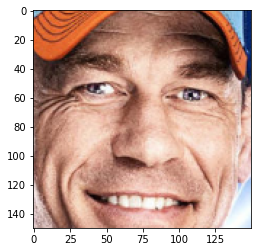

In [ ]:
chemin_dossier_images = './simple_images/john_cena'

if not os.path.exists(chemin_dossier_images):
    print("Le chemin spécifié n'existe pas.")
    exit()

chemins_images = []

for nom_fichier in os.listdir(chemin_dossier_images):
    if nom_fichier.endswith('.jpg') or nom_fichier.endswith('.png') or nom_fichier.endswith('.jpeg'):
        chemin_image = os.path.join(chemin_dossier_images, nom_fichier)
        chemins_images.append(chemin_image)

count=0

for chemin_image in chemins_images:
    image= cv2.imread(chemin_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results=model.predict(image, conf=0.6 ,save=True ,save_conf=True)

    for person in results[0].boxes.data:
        x1=int(person.numpy()[0])
        y1=int(person.numpy()[1])
        x2=int(person.numpy()[2])
        y2=int(person.numpy()[3])

        persImg=image[y1:y2,x1:x2]
        plt.imshow(persImg)

        gray = cv2.cvtColor(persImg,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,4)

        for (x,y,w,h) in faces:
            face=persImg[y:y+h,x:x+w]
            face = cv2.resize(face,dsize=(150,150))
            cv2.rectangle(persImg,(x,y),(x+w,y+h),(255,0,0),3)

        print(len(faces))
        plt.imshow(face)

        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        cv2.imwrite(f'faces/john_cena/img{count}.jpg', face)
        count = count + 1

In [ ]:
from simple_image_download import simple_image_download as simp

response = simp.simple_image_download
keywords = ["man woman boy fece","man face","woman face","boy face"]

for kw in keywords:
    response().download(kw , 100)

[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%


# model CNN pour l'identification des personnes

In [18]:
# Chemins des dossiers d'entraînement
train_dir = './data/train'

# Création d'un générateur d'images
batch_size = 32
image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary')


Found 1172 images belonging to 3 classes.


In [19]:
train_generator.class_indices

{'jackie_chan': 0, 'john_cena': 1, 'unknown': 2}

In [20]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(255, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [22]:
# Entraînement du modèle
cnn_model.fit(train_generator, epochs=10, batch_size=32)

Epoch 1/10
 2/37 [>.............................] - ETA: 1:04 - loss: 1.3655 - accuracy: 0.3438

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 [==============================] - 73s 2s/step - loss: 0.6327 - accuracy: 0.7210
Epoch 2/10
37/37 [==============================] - 70s 2s/step - loss: 0.1458 - accuracy: 0.9514
Epoch 3/10
37/37 [==============================] - 70s 2s/step - loss: 0.0433 - accuracy: 0.9898
Epoch 4/10
37/37 [==============================] - 79s 2s/step - loss: 0.0366 - accuracy: 0.9898
Epoch 5/10
37/37 [==============================] - 71s 2s/step - loss: 0.0179 - accuracy: 0.9940
Epoch 6/10
37/37 [==============================] - 72s 2s/step - loss: 0.0507 - accuracy: 0.9838
Epoch 7/10
37/37 [==============================] - 71s 2s/step - loss: 0.0132 - accuracy: 0.9974
Epoch 8/10
37/37 [==============================] - 69s 2s/step - loss: 0.0028 - accuracy: 0.9991
Epoch 9/10
37/37 [==============================] - 69s 2s/step - loss: 4.3170e-04 - accuracy: 1.0000
Epoch 10/10
37/37 [==============================] - 71s 2s/step - loss: 6.7441e-04 - accuracy: 1.0000


In [23]:
cnn_model.save('cnn_model.h5')

C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from tensorflow.keras.models import load_model

In [38]:
# Chargement du modèle sauvegardé
model_cnn = load_model('cnn_model.h5')

# détection et l'identification des personnes à partir d'une vidéo

In [54]:
face_classifier = cv2.CascadeClassifier('HAAR/haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture("./data/test/John Cena meet Jackie Chan.mp4")
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Créer un objet VideoWriter pour enregistrer la vidéo avec les modifications
out = cv2.VideoWriter('video_modifiee1.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (1280, 720))

color = (0,0,255) #(blue, green, red)

count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if ret == False :
        break

    results = model.predict(frame, conf=0.6 ,save=True ,save_conf=True)

    for person in results[0].boxes.data:
        color = (0,0,255)
        if(int(person.numpy()[5])==0):
            x1=int(person.numpy()[0])
            y1=int(person.numpy()[1])
            x2=int(person.numpy()[2])
            y2=int(person.numpy()[3])

            persImg = frame[y1:y2,x1:x2]

            gray = cv2.cvtColor(persImg,cv2.COLOR_BGR2GRAY)
            faces = face_classifier.detectMultiScale(gray,1.3,4)

            identity = "unknown"

            for (x,y,w,h) in faces:
                face=persImg[y:y+h,x:x+w]

                face = cv2.resize(face, (150, 150))
                face = face / 255.0
                face = np.expand_dims(face, axis=0)

                prediction = model_cnn.predict(face)

                indice_max = np.argmax(prediction[0])

                if indice_max == 0:
                    identity = "jackie_chan"
                    color = (0,255,0)
                else :
                    if indice_max == 1:
                        identity = "john_cena"
                        color = (0,255,0)
                    else:
                        identity = "unknown"
                        color = (0,0,255)

                cv2.rectangle(persImg,(x,y),(x+w,y+h),color,3)

            position_texte = (x1,y1-10)
            font = cv2.FONT_HERSHEY_SIMPLEX
            echelle_texte = 0.8
            epaisseur_texte = 2

            cv2.rectangle(frame,(x1,y1),(x2,y2),color,2)

            # Ajouter du "identity" à l'image
            image_texte = cv2.putText(frame, identity, position_texte, font, echelle_texte, color, epaisseur_texte)

    out.write(frame)
    cv2.imshow('Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 4 persons, 1 car, 755.0ms
Speed: 6.0ms preprocess, 755.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 68ms/step

0: 384x640 4 persons, 2 cars, 625.2ms
Speed: 17.5ms preprocess, 625.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 51ms/step

0: 384x640 4 persons, 2 cars, 541.5ms
Speed: 4.7ms preprocess, 541.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 55ms/step

0: 384x640 4 persons, 2 cars, 554.2ms
Speed: 13.3ms preprocess, 554.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 60ms/step

0: 384x640 4 persons, 2 cars, 553.5ms
Speed: 6.0ms preprocess, 553.5ms inference, 4.0ms po

Results saved to runs\detect\predict2

0: 384x640 3 persons, 522.6ms
Speed: 23.8ms preprocess, 522.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 49ms/step

0: 384x640 2 persons, 505.6ms
Speed: 4.0ms preprocess, 505.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2

0: 384x640 2 persons, 525.6ms
Speed: 3.8ms preprocess, 525.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 44ms/step

0: 384x640 2 persons, 515.6ms
Speed: 5.7ms preprocess, 515.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2

0: 384x640 2 persons, 501.7ms
Speed: 3.1ms preprocess, 501.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2

0: 384x640 3 persons,

1/1 [==============================] - 0s 43ms/step

0: 384x640 1 person, 532.6ms
Speed: 4.0ms preprocess, 532.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 41ms/step

0: 384x640 1 person, 541.6ms
Speed: 5.0ms preprocess, 541.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 43ms/step

0: 384x640 1 person, 514.6ms
Speed: 2.9ms preprocess, 514.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 43ms/step

0: 384x640 1 person, 533.6ms
Speed: 3.0ms preprocess, 533.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
1/1 [==============================] - 0s 42ms/step

0: 384x640 1 person, 498.7ms
Speed: 4.0ms preprocess, 498.7ms inference, 4.

# Entraînement personnalisé du modèle YOLO pour la détection de visages

In [ ]:
response = simp.simple_image_download
keywords = ["personne","personnes","acteurs photos"]

for kw in keywords:
    response().download(kw , 200)

[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%


In [ ]:
# pour lancer le programme d'annotation des images
!labelImg

Cancel creation.

qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sanity
qt.gui.icc: fromIccProfile: failed minimal tag size sani


Image:C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\train\personne_22.jpeg -> Annotation:C:/Users/Hp/Desktop/S3/fst/deep learning/Projet/data_yolo/labels\personne_22.txt
Image:C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\train\personne_23.jpeg -> Annotation:C:/Users/Hp/Desktop/S3/fst/deep learning/Projet/data_yolo/labels\personne_23.txt
Image:C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\train\personne_25.jpeg -> Annotation:C:/Users/Hp/Desktop/S3/fst/deep learning/Projet/data_yolo/labels\personne_25.txt
Image:C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\train\personne_26.jpeg -> Annotation:C:/Users/Hp/Desktop/S3/fst/deep learning/Projet/data_yolo/labels\personne_26.txt
Image:C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\train\personne_27.jpeg -> Annotation:C:/Users/Hp/Desktop/S3/fst/deep learning/Projet/data_yolo/labels\personne_27.txt
Image:C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\train\personne_28.jpeg ->

In [44]:
yolo_faces_model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)

In [51]:
yolo_faces_model.train(data='./custom_data.yaml', epochs=1, imgsz=640)

Ultralytics YOLOv8.0.232 🚀 Python-3.9.12 torch-2.0.0+cpu CPU (Intel Core(TM) i5-6200U 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=./custom_data.yaml, epochs=1, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

train: Scanning C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\train\labels... 394 images, 0 backgrounds, 0 


train: New cache created: C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\train\labels.cache


val: Scanning C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\val\labels... 8 images, 0 backgrounds, 0 corrup

val: New cache created: C:\Users\Hp\Desktop\S3\fst\deep learning\Projet\data_yolo\val\labels.cache


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.117      1.309      1.363         37        640: 100%|██████████| 25/25 [2:10:04<00:00, 3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<0


                   all          8         39      0.857      0.922      0.915      0.659

1 epochs completed in 2.180 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 52.0MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.9.12 torch-2.0.0+cpu CPU (Intel Core(TM) i5-6200U 2.30GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<0


                   all          8         39      0.857      0.922      0.915      0.659
Speed: 4.4ms preprocess, 1787.5ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs\detect\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000018552994850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

# Charger le modèle depuis le disque local

In [31]:
yolo_faces_model = YOLO('./runs/detect/train2/weights/best.pt')

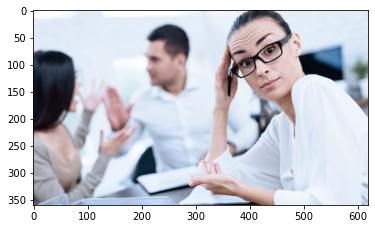

In [32]:
image= cv2.imread("./data_yolo/val/images/personnes_194.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [33]:
results=yolo_faces_model.predict(image, conf=0.9, save=True, save_conf=True)


0: 384x640 2 faces, 1823.1ms
Speed: 4.3ms preprocess, 1823.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict3


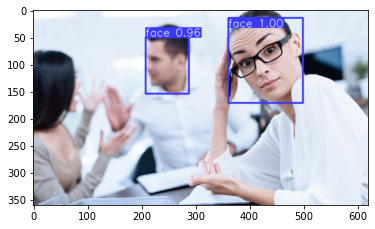

In [34]:
plt.imshow(results[0].plot())

In [36]:
cap=cv2.VideoCapture("./data/test/John Cena meet Jackie Chan.mp4")
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Créer un objet VideoWriter pour enregistrer la vidéo avec les modifications
out = cv2.VideoWriter('video_modifiee_custom_yolo.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (1280, 720))

color = (0,0,255) #(blue, green, red)

count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if ret == False :
        break

    results = model.predict(frame, conf=0.6 ,save=True ,save_conf=True)

    for person in results[0].boxes.data:
        color = (0,0,255)
        if(int(person.numpy()[5])==0):
            x1=int(person.numpy()[0])
            y1=int(person.numpy()[1])
            x2=int(person.numpy()[2])
            y2=int(person.numpy()[3])

            persImg = frame[y1:y2,x1:x2]

            faces=yolo_faces_model.predict(persImg, conf=0.9, save=True, save_conf=True)
            identity = "unknown"
        
            for face in faces[0].boxes.data:
                x11=int(face.numpy()[0])
                y11=int(face.numpy()[1])
                x22=int(face.numpy()[2])
                y22=int(face.numpy()[3])

                faceImg = persImg[y11:y22,x11:x22]

                faceImg = cv2.resize(faceImg, (150, 150))
                faceImg = faceImg / 255.0
                faceImg = np.expand_dims(faceImg, axis=0)

                prediction = model_cnn.predict(faceImg)

                indice_max = np.argmax(prediction[0])

                if indice_max == 0:
                    identity = "jackie_chan"
                    color = (0,255,0)
                else :
                    if indice_max == 1:
                        identity = "john_cena"
                        color = (0,255,0)
                    else:
                        identity = "unknown"
                        color = (0,0,255)

                cv2.rectangle(persImg,(x11,y11),(x22,y22),color,3)

            position_texte = (x1,y1-10)
            font = cv2.FONT_HERSHEY_SIMPLEX
            echelle_texte = 0.8
            epaisseur_texte = 2

            cv2.rectangle(frame,(x1,y1),(x2,y2),color,2)

            # Ajouter du "identity" à l'image
            image_texte = cv2.putText(frame, identity, position_texte, font, echelle_texte, color, epaisseur_texte)

    out.write(frame)
    cv2.imshow('Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 4 persons, 1 car, 745.0ms
Speed: 5.0ms preprocess, 745.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2

0: 640x288 1 face, 1295.5ms
Speed: 4.0ms preprocess, 1295.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 288)
Results saved to runs\detect\predict3
1/1 [==============================] - 0s 77ms/step

0: 640x256 (no detections), 1167.9ms
Speed: 4.0ms preprocess, 1167.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 256)
Results saved to runs\detect\predict3

0: 640x320 (no detections), 1421.2ms
Speed: 4.0ms preprocess, 1421.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs\detect\predict3

0: 640x224 (no detections), 1039.2ms
Speed: 4.0ms preprocess, 1039.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 224)
Results saved to runs\detect\predict3

0: 384x640 4 persons, 2 cars, 580.4ms
Speed: 20.8ms preprocess, 580.4ms inference,


0: 640x256 (no detections), 793.9ms
Speed: 4.9ms preprocess, 793.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 256)
Results saved to runs\detect\predict3

0: 384x640 4 persons, 2 cars, 523.6ms
Speed: 3.9ms preprocess, 523.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2

0: 640x320 2 faces, 995.3ms
Speed: 6.0ms preprocess, 995.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs\detect\predict3
1/1 [==============================] - 0s 49ms/step

0: 640x416 (no detections), 1253.6ms
Speed: 5.0ms preprocess, 1253.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 416)
Results saved to runs\detect\predict3

0: 640x288 (no detections), 904.4ms
Speed: 4.0ms preprocess, 904.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 288)
Results saved to runs\detect\predict3

0: 640x288 (no detections), 938.4ms
Speed: 4.1ms preprocess, 938.4ms inference, 1.0ms 